# Zomato Data Analysis Using Python

## Introduction
In this analysis, Python and its following libraries are used to analyze Zomato data:
- **Numpy**: With Numpy arrays, complex computations are executed quickly, and large calculations are handled efficiently.
- **Matplotlib**: It has a wide range of features for creating high-quality plots, charts, histograms, scatter plots, and more.
- **Pandas**: The library simplifies the loading of data frames into 2D arrays and provides functions for performing multiple analysis tasks in a single operation.
- **Seaborn**: It offers a high-level interface for creating visually appealing and informative statistical graphics.

## Methodology
To answer these questions, the following steps will be taken:
1. Data Loading: Load the Zomato dataset into a Pandas DataFrame.
2. Data Exploration: Explore the dataset to understand its structure, columns, and basic statistics.
3. Data Cleaning: Clean the dataset by handling missing values, formatting columns, and removing duplicates if necessary.
4. Visualization: Use Matplotlib and Seaborn to create visualizations that help in understanding the analysis results.
5. Conclusion: Summarize the findings and insights obtained from the analysis.


In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [62]:
data_df = pd.read_csv('Zomato data .csv')
data_df.sample(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
77,Devanna Dum Biriyani Centre,Yes,No,3.6/5,28,300,Dining
110,Hari Super Sandwich,No,No,3.2/5,0,200,Dining
16,Catch-up-ino,Yes,No,3.9/5,133,800,Cafes
39,Maruthi Davangere Benne Dosa,Yes,No,4.0/5,17,150,Dining
31,Foodiction,Yes,No,2.8/5,506,500,other


In [63]:
# null values
pd.isnull(data_df).sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [64]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


Based on the provided DataFrame with **148** entries and **7** columns, here's a brief analysis:

**Columns**:

- **name**: The name of the restaurant.
- **online_order**: Indicates whether online ordering is available at the restaurant.
- **book_table**: Indicates whether table booking is available at the restaurant.
- **rate**: The rating of the restaurant.
- **votes**: The number of votes the restaurant has received.
- **approx_cost(for two people)**: The approximate cost for two people at the restaurant.
- **listed_in(type)**: The type of cuisine the restaurant is listed under.

**Data Types**:
The DataFrame contains both object (string) and integer data types.
Object data types are commonly used for categorical variables, while integer data types are used for numerical variables.

**Non-Null Counts**:
All columns have non-null counts of 148, indicating that there are no missing values in the DataFrame.

In [65]:
# convert data_tyoe of rate column to float and remove the denominator

def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)
data_df['rate']= data_df['rate'].apply(handleRate)
data_df.rate.head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [66]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


There is no **NULL** value in dataframe.

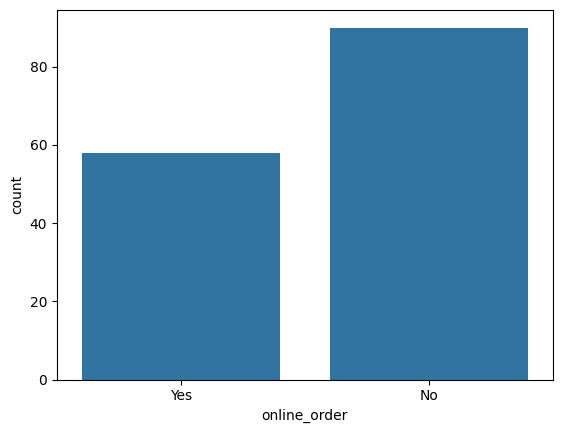

In [67]:
sns.countplot(x = data_df['online_order']);

**Conclusion**: This suggests that a majority of the restaurants do not accept online orders.

In [68]:
# list of restaurants which accepts online order
accept_online_order = data_df.loc[data_df.online_order == 'Yes' , 'name']
accept_online_order_df = pd.DataFrame({"Restaurant's Name" : accept_online_order }) 
print("List of restaurants which accepts online order: \n ")
print(accept_online_order_df.head())

List of restaurants which accepts online order: 
 
  Restaurant's Name
0             Jalsa
1    Spice Elephant
2   San Churro Cafe
5   Timepass Dinner
7            Onesta


In [69]:
# list of restaurants which  don't accepts online order
reject_online_order = data_df.loc[data_df.online_order == 'No' , 'name']
reject_online_order_df = pd.DataFrame({"Restaurant's Name" : reject_online_order }) 
print("List of restaurants which don't accepts online order: \n ")
print(reject_online_order_df.head())

List of restaurants which don't accepts online order: 
 
                                  Restaurant's Name
3                             Addhuri Udupi Bhojana
4                                     Grand Village
6   Rosewood International Hotel - Bar & Restaurant
13                                       Caf-Eleven
18                                         T3H Cafe


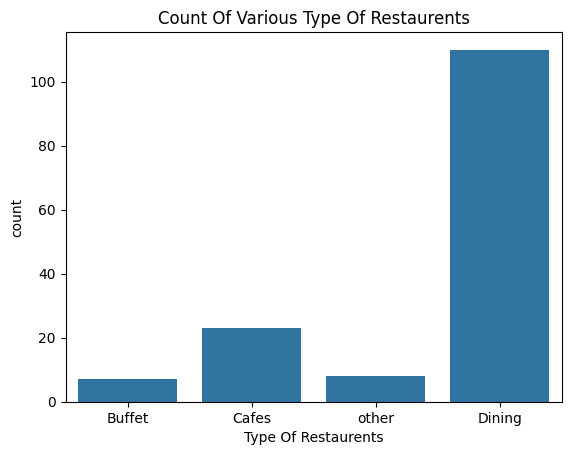

In [70]:
sns.countplot(x = 'listed_in(type)' ,
              data = data_df)
plt.title('Count Of Various Type Of Restaurents')
plt.xlabel("Type Of Restaurents");

**Conclusion**: The majority of the restaurants fall into the dining category.

In [71]:
# Analysis of votes for different type of restaurants.
vote_groupby_sum = data_df.groupby('listed_in(type)')['votes'].sum()

In [72]:
vote_groupby_sum

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

In [73]:
result= pd.DataFrame({'votes' : vote_groupby_sum })
result

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


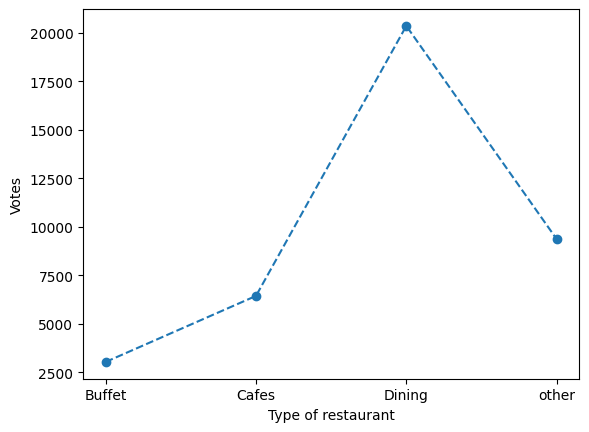

In [74]:
plt.xlabel("Type of restaurant", size=10)
plt.ylabel("Votes", size=10)
plt.plot(result , 'o--');

**Conclusion**: Dining restaurants are preferred by a larger number of individuals.

In [75]:
# determine the restaurant’s name that received the maximum votes.

max_votes = data_df['votes'].max()
restaurant_with_max_votes = data_df.loc[data_df.votes == max_votes , 'name']
print("The restaurant with maximum votes is :")
print(restaurant_with_max_votes)

The restaurant with maximum votes is :
38    Empire Restaurant
Name: name, dtype: object


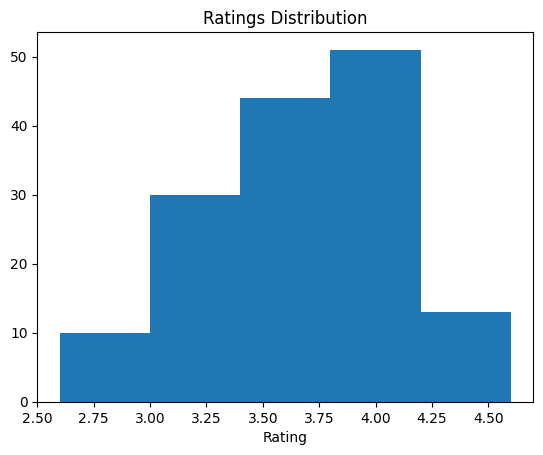

In [80]:
# distribution of rating 

plt.hist(data_df['rate'] , bins = 5);
plt.title("Ratings Distribution")
plt.xlabel("Rating");

**Conclusion**: The majority of restaurants received ratings ranging from 3.5 to 4.

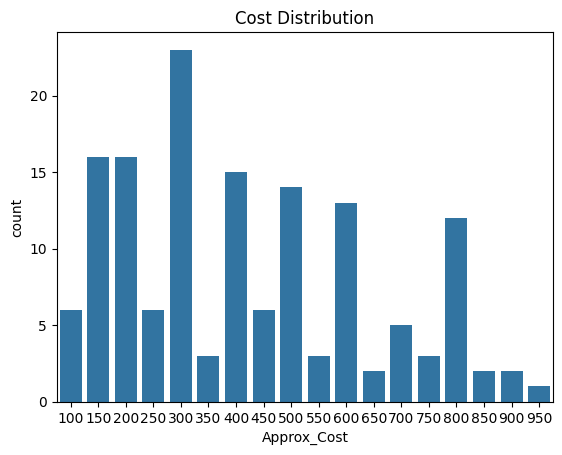

In [83]:
# analysis approx_cost(for two people)
plt.title("Cost Distribution")
plt.xlabel("Approx_Cost");
sns.countplot( x = 'approx_cost(for two people)',
             data = data_df);

**Conclusion**: The majority of couples prefer restaurants with an approximate cost of 300 rupees.

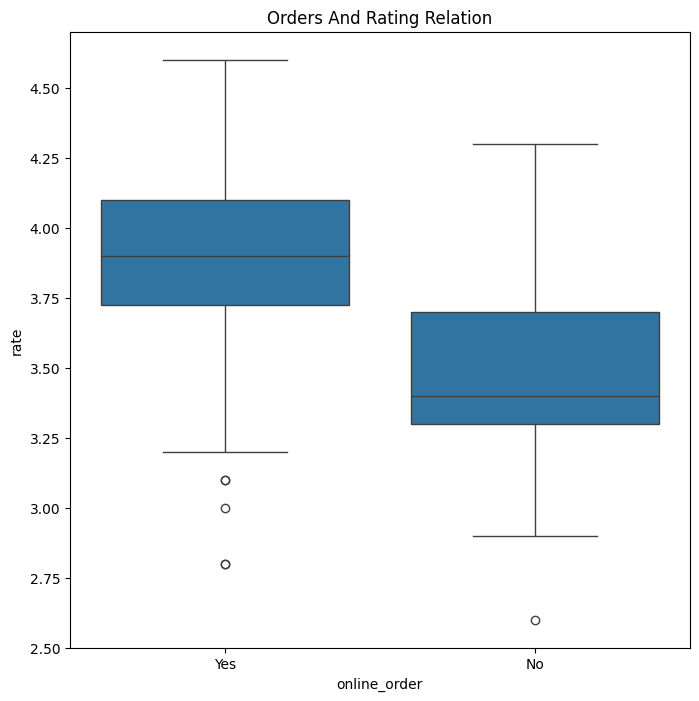

In [90]:
# examine whether online orders receive higher ratings than offline orders.

plt.figure(figsize = (8,8))
plt.title("Orders And Rating Relation")
sns.boxplot(x = 'online_order', y = 'rate', data = data_df);

**Conclusion**: Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.

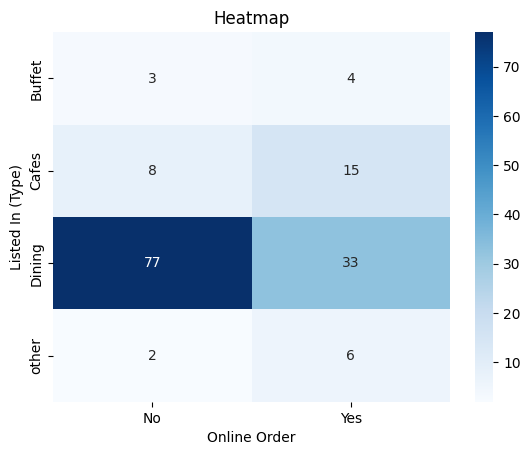

In [93]:
pivot_table = data_df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)

sns.heatmap(pivot_table, annot=True, cmap="Blues", fmt='d')

plt.title("Heatmap")

plt.xlabel("Online Order")

plt.ylabel("Listed In (Type)")
plt.show()

**Conclusion**: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.

## Conclusion
By following the outlined methodology, we aim to provide insights into the Zomato data, answering the specified questions and gaining a better understanding of restaurant preferences, services, and pricing trends among customers.